<h1> Case Study - Cyclistic Bike Share </h1>

<h2>Hypothesis</h2>

<ul>
    <li> The director of marketing believes the company's future success depends on maximising the number of annual memberships.</li>
</ul>

<h2> What we know so far </h2> 

<ul>
    <li>A bike-share program tha features more than 5800 bicycle and 600 docking stations.</li>
    <li>Offers wide range of bikes</li>
    <li>Majority of riders opt for traditional bikes</li>
    <li>Abnout 8% of riders use the assistive options</li>
    <li>Users are more likely to ride for leisure</li>
    <li>About 30% of users use them to commute to work each day</li>
    <li>There are flexibility of pricing plans. Single-ride passes, full-day passes and annual memberships.</li>
    <li>Customers who purchase single-ride or full-day passes are referred to as casual riders.</li>
    <li>Customers who purchase annual memberships are Cyclistic members</li>
</ul>

<h2> Deliverables </h2>

<ul>
    <li>A clear statement of the business tasks</li>
    <li>A Description of all data sources used</li>
    <li>Documentation of any cleaning or manipulation of data</li>
    <li>A summary of my analysis</li>
    <li>Visualise key findings</li>
    <li>Top three recommendations based on the analysis</li>
</ul>

<h1>Ask</h1>

<ul>
    <li>Understand how casual riders and annual members use Cyclistic bikes differently.</li>
    <li>Convert casual riders into annual memebrs.</li>
    <li>Better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics.</li>
    <li>Analyse the Cyclistic historical bike trip data to identify trends.</li>
</ul>

<h2>Thought Process</h2>

<ul>
    <li>I chose python to use since data is too big to load it on Exel.</li>
<li>what to do with NaN? See How many NaNs are there and decide if it safe to remove them or find the right value for them.</li>
<li>Potentially able to get missing stations from lat and long values.</li>
<li>do same stations share same first view lag and lat values?</li>
<li>Check for mismatching station name and station ID</li>
<li>Once it's done, remove lag and lon columns. Not required for further analysis.</li>
</ul>

<ul>
<li>Find out which station (station ID) has most casual members and run campaigns there.</li>
<li>when is the best month to promote?</li>
<li>most popular hour?</li>
<li>most popular bike per station? targeted ad campaign</li>
</ul>

<ul>    
<li>which are the most poorly performing and best performing staiontions interms of number of hires?</li>
<li>What can we do with this?</li>
<li>Station with most busy AND most casuals should be targeted</li>
</ul>
    
<ul>    
<li>what are the most popular ride types are hired by Members? Should we push the most popular bike hired by members to casuals?</li>
</ul>
    
<ul>
<li>What is the ratio between Members and Casuals in each station.</li>
<li>How many casuals and memebrs are there in each station (unique users)</li>
</ul>

<ul>
<li>Filter by casual members to see most popuplar time to hire a bike</li>
</ul>

<ul>    
<li>Remove duplicate to see true number of casuals.</li>
<li>Don't remove the casual for frequency.</li>
</ul>

<ul>
<li>Final answer top 3 station with most busy AND most casuals AND time of the month with most popular ride type.</li>
</ul>

<ul>
<li>what is the average time Members and Casuals ride? how do they differ? (Not sure how this will help with answering the questions)</li>
</ul>

<ul>    
<li>find out how often casuals and members hire a bike?</li>
</ul>

<ul>    
<li>Can we find out which station casuals have converted to members over the past 12 month?</li>
<li>Try to discover which month was most popular?</li>
<li>Try to find out what might have caused this?</li>
</ul>

In [ ]:
# remove longitued and latitude
# clean NaN and Nulls
# see if there are any duplicates?


<h1> Prepare </h1>

<p>Guiding questions</p>
<ul>
    <li>Where is your data located?</li>
    <li>How is the data organized?</li>
    <li>Are there issues with bias or credibility in this data? Does your data ROCCC?</li>
    <li>How are you addressing licensing, privacy, security, and accessibility?</li>
    <li>How did you verify the data’s integrity?</li>
    <li>How does it help you answer your question?</li>
    <li>Are there any problems with the data?</li>
</ul>

<h1> Process </h1>

<h2 style="color:#484848"> Task 1 - Load data</h2>

<h4 style="color:#808080">Step 1 - Import plugins</h4>

In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

<h4 style="color:#808080">Step 2 - Import all CSV files and combined it in a single file</h4>

In [ ]:

path = "./Cyclistic_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])


<h4 style="color:#808080">Step 3 - Save newly created file</h4>

In [ ]:
all_months_data.to_csv("all_cyclistic_data.csv", index=False)

<h4 style="color:#808080">Step 4 - Load the data</h4>

In [2]:
df = pd.read_csv("all_cyclistic_data.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h4 style="color:#808080">Step 5 - Check if the data has imported correctly</h4>

In [4]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489743,73F13E3E24954C57,docked_bike,2020-10-28 08:31:24,2020-10-28 08:37:50,Leavitt St & Division St,658.0,Wood St & Augusta Blvd,657.0,41.902997,-87.683825,41.899181,-87.672200,member
3489744,6F68E6F5704E2C08,docked_bike,2020-10-06 10:04:49,2020-10-06 10:13:25,Aberdeen St & Jackson Blvd,21.0,Loomis St & Lexington St,320.0,41.877726,-87.654787,41.872187,-87.661501,member
3489745,79C12697BEBF5B0A,docked_bike,2020-10-15 06:54:49,2020-10-15 07:22:23,California Ave & Altgeld St,502.0,California Ave & Altgeld St,502.0,41.926690,-87.697668,41.926690,-87.697668,casual
3489746,907E10168C2F53FE,docked_bike,2020-10-16 10:29:59,2020-10-16 10:50:10,Lincoln Ave & Diversey Pkwy,152.0,Ashland Ave & Blackhawk St,333.0,41.932225,-87.658617,41.907066,-87.667252,casual


<h2 style="color:#484848">Task 2 - Clean Data</h2>

<h3> Task 2.1. Check if station names can be identified by using lat and lng values </h3>

<h4>Step 1 - Check for lat and lng value for a station</h4>

In [5]:
df[df["start_station_name"] == "Morgan St & Polk St"].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
22,0370B5DA8B8E0FA2,electric_bike,2020-11-06 22:23:36,2020-11-06 22:29:15,Morgan St & Polk St,241.0,NaN,NaN,41.872028,-87.650915,41.890000,-87.650000,casual
1539,2CCAF4E63E40E4D8,electric_bike,2020-11-05 19:50:32,2020-11-05 19:57:01,Morgan St & Polk St,241.0,Racine Ave & 13th St,136.0,41.871984,-87.651074,41.865037,-87.657092,casual
1629,F1BD47727382A9F0,electric_bike,2020-11-10 15:13:12,2020-11-10 15:17:36,Morgan St & Polk St,241.0,Halsted St & Maxwell St,282.0,41.872015,-87.651071,41.864972,-87.647032,casual
2328,D3CDBF117D82A14F,electric_bike,2020-11-28 22:38:31,2020-11-28 22:41:25,Morgan St & Polk St,241.0,Loomis St & Lexington St,320.0,41.872046,-87.651064,41.872183,-87.661274,casual
2879,819C7DB19E4EACC8,electric_bike,2020-11-09 16:03:28,2020-11-09 16:09:13,Morgan St & Polk St,241.0,Loomis St & Lexington St,320.0,41.871993,-87.650949,41.872178,-87.661321,casual


<h4> Step 2 - Check if Morgan St & Polk St stations start with lat 41.87 and lng value -87.65</h4>

In [6]:
temp_df = df[df["start_lat"].astype("str").str.contains("41.87") & df["start_lng"].astype("str").str.contains("-87.65")]
temp_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
22,0370B5DA8B8E0FA2,electric_bike,2020-11-06 22:23:36,2020-11-06 22:29:15,Morgan St & Polk St,241.0,NaN,NaN,41.872028,-87.650915,41.890000,-87.650000,casual
156,2C32C48C6F8CFBA4,electric_bike,2020-11-06 11:53:26,2020-11-06 12:07:45,NaN,NaN,NaN,NaN,41.870000,-87.650000,41.890000,-87.650000,casual
423,D24652C9069A785A,electric_bike,2020-11-22 13:08:23,2020-11-22 13:16:05,Aberdeen St & Jackson Blvd,21.0,Carpenter St & Huron St,92.0,41.877721,-87.654901,41.894442,-87.653498,casual
485,27653601D854F5D1,electric_bike,2020-11-25 22:38:41,2020-11-25 22:43:06,Aberdeen St & Jackson Blvd,21.0,Loomis St & Jackson Blvd,146.0,41.877781,-87.654810,41.877982,-87.662023,casual
500,435EA4857DF7AB4A,electric_bike,2020-11-09 09:08:41,2020-11-09 09:22:31,Aberdeen St & Jackson Blvd,21.0,Wabash Ave & Grand Ave,199.0,41.877595,-87.654919,41.891517,-87.626749,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488656,1B0D2C916DFEA870,docked_bike,2020-10-02 11:27:39,2020-10-02 12:21:30,Aberdeen St & Jackson Blvd,21.0,Aberdeen St & Jackson Blvd,21.0,41.877726,-87.654787,41.877726,-87.654787,casual
3489124,67B44AEFEFA63DB6,docked_bike,2020-10-08 11:19:01,2020-10-08 11:23:42,Aberdeen St & Jackson Blvd,21.0,Aberdeen St & Randolph St,621.0,41.877726,-87.654787,41.884114,-87.654264,member
3489212,5D67EDB61BA434B8,electric_bike,2020-10-07 19:39:01,2020-10-07 19:52:10,Aberdeen St & Jackson Blvd,21.0,NaN,NaN,41.877745,-87.654722,41.880000,-87.650000,member
3489213,1448BEAE7257E83B,electric_bike,2020-10-07 12:49:33,2020-10-07 12:58:45,Aberdeen St & Jackson Blvd,21.0,NaN,NaN,41.877668,-87.654822,41.860000,-87.670000,member


<h4>Result</h4>
<p>There are multiple stations that contains the same lat and lng values. Unable to locate station name by first 4 common values. Remove all rows with missing station name and ids</p>

<h3>Task 2.2. Remove all NaN values</h3>

<h4>Step 1 - Check for any NaN values</h4>

In [7]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
7,9E7A79ADA90C2695,electric_bike,2020-11-14 16:04:15,2020-11-14 16:19:33,NaN,NaN,NaN,NaN,41.910000,-87.620000,41.910000,-87.620000,casual
11,586E86B0E03B75CE,electric_bike,2020-11-14 09:10:26,2020-11-14 09:23:43,NaN,NaN,Spaulding Ave & Armitage Ave,506.0,41.950000,-87.710000,41.917184,-87.710245,casual
13,953E715FCB27D545,electric_bike,2020-11-14 13:04:38,2020-11-14 13:10:11,NaN,NaN,NaN,NaN,41.790000,-87.590000,41.800000,-87.590000,casual
17,C1593A866828113F,electric_bike,2020-11-07 11:48:55,2020-11-07 11:57:46,NaN,NaN,Lake Shore Dr & North Blvd,268.0,41.890000,-87.630000,41.911665,-87.626829,casual
22,0370B5DA8B8E0FA2,electric_bike,2020-11-06 22:23:36,2020-11-06 22:29:15,Morgan St & Polk St,241.0,NaN,NaN,41.872028,-87.650915,41.890000,-87.650000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489545,0024BACE35AB06C7,electric_bike,2020-10-27 18:44:48,2020-10-27 18:50:45,NaN,NaN,Ashland Ave & Wellington Ave,250.0,41.940000,-87.670000,41.936108,-87.669938,member
3489546,821571961AB70D68,electric_bike,2020-10-27 18:10:32,2020-10-27 18:19:21,Ashland Ave & Wellington Ave,250.0,NaN,NaN,41.936084,-87.669960,41.940000,-87.670000,member
3489553,F8A81A086EE66757,electric_bike,2020-10-16 15:01:00,2020-10-16 15:02:36,NaN,NaN,NaN,NaN,41.950000,-87.750000,41.950000,-87.740000,member
3489554,7D32CDC06A87367B,electric_bike,2020-10-14 14:37:16,2020-10-14 15:10:31,Dearborn Pkwy & Delaware Pl,140.0,NaN,NaN,41.898859,-87.629886,41.950000,-87.740000,member


<h4> Step 2 - Remove all NaN rows </h4>

In [8]:
temp = df.dropna()
temp

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489743,73F13E3E24954C57,docked_bike,2020-10-28 08:31:24,2020-10-28 08:37:50,Leavitt St & Division St,658.0,Wood St & Augusta Blvd,657.0,41.902997,-87.683825,41.899181,-87.672200,member
3489744,6F68E6F5704E2C08,docked_bike,2020-10-06 10:04:49,2020-10-06 10:13:25,Aberdeen St & Jackson Blvd,21.0,Loomis St & Lexington St,320.0,41.877726,-87.654787,41.872187,-87.661501,member
3489745,79C12697BEBF5B0A,docked_bike,2020-10-15 06:54:49,2020-10-15 07:22:23,California Ave & Altgeld St,502.0,California Ave & Altgeld St,502.0,41.926690,-87.697668,41.926690,-87.697668,casual
3489746,907E10168C2F53FE,docked_bike,2020-10-16 10:29:59,2020-10-16 10:50:10,Lincoln Ave & Diversey Pkwy,152.0,Ashland Ave & Blackhawk St,333.0,41.932225,-87.658617,41.907066,-87.667252,casual


<h4>Result</h4>
<p>195,057 rows containing NaN are removed.</p>

<h3> Task 2.3. Check if a station has more than one ids </h3>

<h4> Step 1 - Check how many unique ids are there for a station </h4>

In [9]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294691 entries, 0 to 3489747
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 351.9+ MB


In [10]:
# There are 4 unique IDs for station name Desplaines St & Kinzie St
temp.loc[temp["start_station_name"] == "Desplaines St & Kinzie St", "start_station_id"].nunique()
# Checking which 4 unique values are
temp.loc[temp["start_station_name"] == "Desplaines St & Kinzie St", "start_station_id"].unique()

array([56.0, '56.0', 'TA1306000003', '56'], dtype=object)

<h4> Step 2 - Remove ids contain str </h4>

In [11]:
temp = temp[~temp["start_station_id"].astype("str").str.contains("[a-zA-Z]")]

In [12]:
# Checking 
temp.loc[temp["start_station_name"] == "Lincoln Ave & Diversey Pkwy", "start_station_id"].unique()

array([152.0, '152.0', '152'], dtype=object)

In [13]:
# Checking 
temp["start_station_id"] = temp["start_station_id"].astype("float")
temp["start_station_id"] = temp["start_station_id"].astype("int")

<ipython-input-13-f0b03df208a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["start_station_id"] = temp["start_station_id"].astype("float")
<ipython-input-13-f0b03df208a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["start_station_id"] = temp["start_station_id"].astype("int")


In [14]:
temp.loc[temp["start_station_name"] == "Lincoln Ave & Diversey Pkwy", "start_station_id"].unique()

array([152])

<h4> Step 3 - Repeat the process for the end station id </h4>

In [15]:
temp = temp[~temp["end_station_id"].astype("str").str.contains("[a-zA-Z]")]

In [16]:
# Cleaner code to write the same thing
#temp["end_station_id"] = temp["end_station_id"].astype(float).apply(lambda x: round(x))
#temp.loc[temp["end_station_name"] == "Stave St & Armitage Ave", "end_station_id"].unique()

In [17]:
# Checking
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944711 entries, 0 to 3489747
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    int64  
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), int64(1), object(8)
memory usage: 314.5+ MB


<h4>Result</h4>
<p>Identified that there are station ID with strings. Removed them from the table</p>

In [18]:
#••••••••••••••••••••••••••••••••••••••••••••••••
group = temp.groupby("start_station_name")
temp_station = group.apply(lambda x: x["start_station_id"].unique())

station_df = temp_station.reset_index()
station_df = pd.DataFrame(station_df)

station_df.columns = ["start_station_name", "id"]

In [19]:
# Truning id's in to a list
list1 = station_df["id"].tolist()

total = 0
for i in range(len(list1)):
    if len(list1[i]) == 2:
        total = total + 1    
print(total)

279


In [20]:
# Same outcome but cleaner code by using list comprehensions ###
# len([x for x in list1 if len(x) == 2])

<h3> There are total of 279 out of 697 stations that have two station IDs

<h2>Task 3 - Add columns necessary for analysis </h2>

In [21]:
temp["started_at"] = pd.to_datetime(temp["started_at"])
temp["ended_at"] = pd.to_datetime(temp["ended_at"])

temp["started_month"] = temp["started_at"].dt.month
temp["started_hour"] = temp["started_at"].dt.hour
temp["ended_month"] = temp["ended_at"].dt.month
temp["ended_hour"] = temp["ended_at"].dt.hour

temp.info()

casuals = temp[temp["member_casual"] == "casual"]
members = temp[temp["member_casual"] == "member"]
members

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944711 entries, 0 to 3489747
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    int64         
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  started_month       int64         
 14  started_hour        int64         
 15  ended_month         int64         
 16  ended_hour          int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(6)
memory usage: 404.4+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_month,started_hour,ended_month,ended_hour
782,33B7355A1C127DFD,electric_bike,2020-11-03 12:55:39,2020-11-03 12:58:47,Burling St & Diversey Pkwy,332,Wilton Ave & Diversey Pkwy,13.0,41.933056,-87.647731,41.932506,-87.652629,member,11,12,11,12
849,123E8090FFE69E91,electric_bike,2020-11-10 13:22:34,2020-11-10 13:41:05,Ashland Ave & Chicago Ave,350,Dearborn St & Monroe St,49.0,41.895943,-87.667770,41.881853,-87.630241,member,11,13,11,13
850,5FE412B56C022829,electric_bike,2020-11-10 12:56:19,2020-11-10 13:00:59,Kedzie Ave & Lake St,377,California Ave & Lake St,378.0,41.884535,-87.706337,41.884387,-87.696500,member,11,12,11,13
851,24557526C473C4C7,electric_bike,2020-11-10 13:02:01,2020-11-10 13:14:35,California Ave & Lake St,378,Ashland Ave & Chicago Ave,350.0,41.884525,-87.696207,41.895910,-87.668056,member,11,13,11,13
853,B01D258231E23B28,electric_bike,2020-11-10 14:36:34,2020-11-10 14:59:56,Dearborn St & Monroe St,49,Damen Ave & Madison St,215.0,41.880662,-87.629427,41.881438,-87.674786,member,11,14,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489739,477C4FECC7981887,docked_bike,2020-10-05 10:02:05,2020-10-05 10:10:10,Loomis St & Lexington St,320,Aberdeen St & Jackson Blvd,21.0,41.872187,-87.661501,41.877726,-87.654787,member,10,10,10,10
3489740,FB19C362DBC5CB5C,docked_bike,2020-10-22 20:16:32,2020-10-22 20:32:25,Dearborn St & Erie St,110,Dusable Harbor,6.0,41.893992,-87.629318,41.886976,-87.612813,member,10,20,10,20
3489742,0C1EEACCE8266C69,docked_bike,2020-10-05 15:39:58,2020-10-05 15:44:46,Loomis St & Lexington St,320,Morgan St & Polk St,241.0,41.872187,-87.661501,41.871737,-87.651030,member,10,15,10,15
3489743,73F13E3E24954C57,docked_bike,2020-10-28 08:31:24,2020-10-28 08:37:50,Leavitt St & Division St,658,Wood St & Augusta Blvd,657.0,41.902997,-87.683825,41.899181,-87.672200,member,10,8,10,8


<h1> Analysis </h1>

<h2> Question 1: Most used start station name by member and casual </h2>

In [22]:
# Start station
count = temp.pivot_table(index= temp["start_station_name"], aggfunc="size")
count_df = pd.DataFrame(count)
count_df = count_df.sort_values(by = 0, ascending = False).head(10)
print(count_df)

# End station
count1 = temp.pivot_table(index= temp["end_station_name"], aggfunc="size")
count_df1 = pd.DataFrame(count1)
count_df1 = count_df1.sort_values(by = 0, ascending = False).head(10)
print(count_df1)

                                0
start_station_name               
Streeter Dr & Grand Ave     33918
Lake Shore Dr & Monroe St   28342
Clark St & Elm St           27381
Theater on the Lake         27338
Lake Shore Dr & North Blvd  24767
Millennium Park             22997
Broadway & Barry Ave        22130
Clark St & Armitage Ave     21860
Dearborn St & Erie St       21582
Wells St & Concord Ln       21470
                                0
end_station_name                 
Streeter Dr & Grand Ave     36169
Theater on the Lake         28756
Lake Shore Dr & Monroe St   27869
Clark St & Elm St           27254
Lake Shore Dr & North Blvd  25384
Millennium Park             24141
Broadway & Barry Ave        22623
Dearborn St & Erie St       21928
Wells St & Concord Ln       21881
St. Clair St & Erie St      21196


<h3>Answer</h3>
<p>Top 5 Stations used to hire bikes by both members and casual are Streeter Dr & Grand Ave, Lake Shore Dr & Monroe St, Clark St & Elm St,Theater on the Lake,Lake Shore Dr & North Blvd<p>

In [23]:
count_df = count_df.sort_values(by = "start_station_name", ascending = False).head(10)
count_df

,0
start_station_name,
Wells St & Concord Ln,21470
Theater on the Lake,27338
Streeter Dr & Grand Ave,33918
Millennium Park,22997
Lake Shore Dr & North Blvd,24767
Lake Shore Dr & Monroe St,28342
Dearborn St & Erie St,21582
Clark St & Elm St,27381
Clark St & Armitage Ave,21860


<h3>Plotting</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

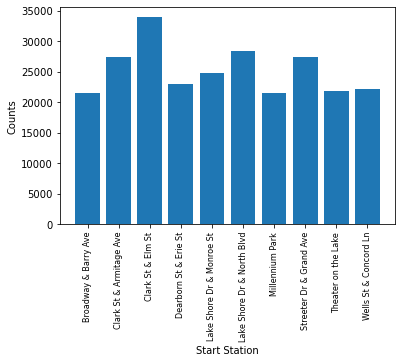

In [24]:
# This is way to get values for x axes
products = [product for product, count_df in count_df.groupby("start_station_name")]

# Months as x aes and result as y aes
plt.bar(products, count_df[0])

# Adding legends
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Counts")
plt.xlabel("Start Station")

plt.show

In [25]:
temp[temp.duplicated(["ride_id"])]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_month,started_hour,ended_month,ended_hour
263336,52C655580214D2EF,docked_bike,2020-12-15 12:05:19,2020-11-25 19:03:00,Milwaukee Ave & Wabansia Ave,13243,Wood St & Chicago Ave,637,41.912616,-87.681391,41.895634,-87.672069,member,12,12,11,19
265151,8845B3D51C97E104,docked_bike,2020-12-15 12:15:40,2020-11-25 16:49:06,LaSalle St & Washington St,13006,Kingsbury St & Erie St,13265,41.882664,-87.632530,41.893808,-87.641697,member,12,12,11,16
265747,7ECFE66F1EEA71F0,docked_bike,2020-12-15 11:48:22,2020-11-25 14:34:13,Eastlake Ter & Rogers Ave,523,Greenview Ave & Jarvis Ave,520,42.020887,-87.665057,42.015962,-87.668570,member,12,11,11,14
275350,214A29191EEB053A,docked_bike,2020-12-15 12:09:31,2020-11-25 09:38:35,Sangamon St & Washington Blvd,13409,Ada St & Washington Blvd,13353,41.883165,-87.651100,41.882830,-87.661206,member,12,12,11,9
275458,6D233DAFDBB4BB08,docked_bike,2020-12-15 11:49:02,2020-11-25 13:50:43,Damen Ave & Cortland St,13133,Damen Ave & Cortland St,13133,41.915983,-87.677335,41.915983,-87.677335,casual,12,11,11,13
277384,5B658501758DF1F1,docked_bike,2020-12-15 12:17:51,2020-11-25 14:05:56,Throop St & Taylor St,13139,Loomis St & Lexington St,13332,41.868968,-87.659141,41.872187,-87.661501,member,12,12,11,14
280894,C763BA9D0F6ED827,docked_bike,2020-12-15 12:21:52,2020-11-25 19:13:39,Broadway & Barry Ave,13137,Clark St & Armitage Ave,13146,41.937582,-87.644097,41.918306,-87.636282,member,12,12,11,19
286947,0C3CB45FD307654C,docked_bike,2020-12-15 12:04:59,2020-11-25 18:41:47,Clarendon Ave & Junior Ter,13389,Broadway & Belmont Ave,13277,41.961004,-87.649603,41.940106,-87.645451,member,12,12,11,18
290761,8621E905EF481E58,docked_bike,2020-12-15 11:54:00,2020-11-25 15:41:11,Clark St & Newport St,632,Southport Ave & Roscoe St,13071,41.944540,-87.654678,41.943739,-87.664020,member,12,11,11,15
294609,EAB41740602B3BA6,docked_bike,2020-12-15 12:10:30,2020-11-25 19:46:49,Rush St & Superior St,15530,Rush St & Superior St,15530,41.895764,-87.625908,41.895765,-87.625908,member,12,12,11,19


In [26]:
casuals = temp[(temp["member_casual"] == "casual")]
count_casual = casuals.pivot_table(index=temp["start_station_name"], aggfunc="size")

count_casual_df = pd.DataFrame(count_casual)
count_casual_df = count_casual_df.sort_values(by = 0, ascending = False).head(10)
count_casual_df = count_casual_df.sort_values(by = "start_station_name", ascending = True)

<function matplotlib.pyplot.show(close=None, block=None)>

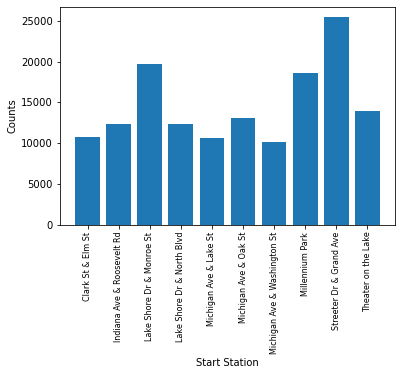

In [27]:
# This is way to get values for x axes
products = [product for product, count_casual_df in count_casual_df.groupby("start_station_name")]

# Months as x aes and result as y aes
plt.bar(products, count_casual_df[0])

# Adding legends
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Counts")
plt.xlabel("Start Station")

plt.show

<h2>Question 2: Most popular station name by casuals</h2>

In [28]:
count_casual = casuals.pivot_table(index=casuals["start_station_name"], aggfunc="size")
count_casual = pd.DataFrame(count_casual)
count_casual = count_casual.sort_values(by = 0, ascending = False).head(10)
print(count_casual)


count_casual1 = casuals.pivot_table(index=casuals["end_station_name"], aggfunc="size")
count_casual1 = pd.DataFrame(count_casual1)
count_casual1 = count_casual1.sort_values(by = 0, ascending = False).head(10)
print(count_casual1)

                                  0
start_station_name                 
Streeter Dr & Grand Ave       25422
Lake Shore Dr & Monroe St     19761
Millennium Park               18629
Theater on the Lake           13928
Michigan Ave & Oak St         13064
Lake Shore Dr & North Blvd    12362
Indiana Ave & Roosevelt Rd    12348
Clark St & Elm St             10796
Michigan Ave & Lake St        10623
Michigan Ave & Washington St  10152
                                  0
end_station_name                   
Streeter Dr & Grand Ave       27705
Millennium Park               19422
Lake Shore Dr & Monroe St     19363
Theater on the Lake           15586
Michigan Ave & Oak St         13509
Lake Shore Dr & North Blvd    13248
Indiana Ave & Roosevelt Rd    12392
Clark St & Elm St             10237
Michigan Ave & Lake St        10180
Michigan Ave & Washington St  10131


<h3>Answer</h3>
<p>Top 5 Stations used to hire bikes by casuals are Streeter Dr & Grand Ave, Lake Shore Dr & Monroe St, Millennium Park,Theater on the Lake, Michigan Ave & Oak St.We can tell that stations are different when filtered by casuals only</p>
<p>There was a slight change in rankings based on the start and end station. However, the Top 1 and top 10 lists remained the same. Not significant enough to make any difference in the outcome of the analysis</p>

<h2>Question 3: Most popular month by casuals - Start station</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

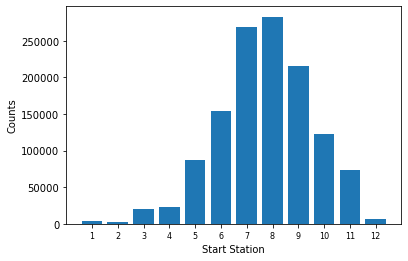

In [29]:
count_month = casuals.pivot_table(index=temp["started_month"], aggfunc="size")
count_month

count_month_df = pd.DataFrame(count_month)

products = [product for product, count_month_df in count_month_df.groupby("started_month")]

# Months as x aes and result as y aes
plt.bar(products, count_month_df[0])

# Adding legends
plt.xticks(products, size=8)
plt.ylabel("Counts")
plt.xlabel("Start Station")

plt.show

<h3> Answer: August followed by July </h3>

<h2>Question 4: Most popular hour by casuals - Start station</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

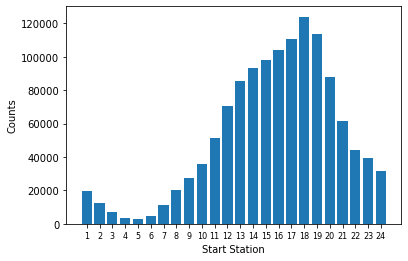

In [30]:
count_hour = casuals.pivot_table(index=temp["started_hour"], aggfunc="size")

count_hour_df = pd.DataFrame(count_hour)

products = range(1,25)

# Months as x aes and result as y aes
plt.bar(products, count_hour_df[0])

# Adding legends
plt.xticks(products, size=8)
plt.ylabel("Counts")
plt.xlabel("Start Station")

plt.show

In [31]:
# There are just way too many stations with two station id that it would be too time consuming to merge them in to one

# Or can I create a new id by combining two numbers? but still I would need to repeat the process at least 500 times.

print

<function print>

<h3> Answer: 6 - 7 pm </h3>

<h2> Question 5: Most popular hour by casuals - End station </h2>

<function matplotlib.pyplot.show(close=None, block=None)>

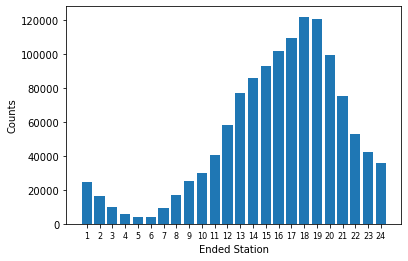

In [32]:
count_hour = casuals.pivot_table(index=temp["ended_hour"], aggfunc="size")

count_hour_df = pd.DataFrame(count_hour)

products = range(1,25)

# Months as x aes and result as y aes
plt.bar(products, count_hour_df[0])

# Adding legends
plt.xticks(products, size=8)
plt.ylabel("Counts")
plt.xlabel("Ended Station")

plt.show

<h3> Answer: 6 - 7 pm </h3>

<h2>Question 6: Average ride time by member and casual</h2>

In [33]:
casual_difference = (casuals["ended_at"] - casuals["started_at"])
print(casual_difference.mean())

member_difference = (members["ended_at"] - members["started_at"])
print(member_difference.mean())

0 days 00:45:55.284324217
0 days 00:15:22.769991389


<h3>Answer: Average ride time for Casual is 46 minutes, and 15 minutes for Member </h3>

<h2>Question 7: Most popular rideable type by member and casual</h2>

In [34]:
count_rideable_type_casual = casuals.pivot_table(index=casuals["rideable_type"], aggfunc="size")
count_rideable_type_casual_df = pd.DataFrame(count_rideable_type_casual)
count_rideable_type_casual_df = count_rideable_type_casual_df.reset_index()
print(count_rideable_type_casual_df)

count_rideable_type_member = members.pivot_table(index=members["rideable_type"], aggfunc="size")
print(count_rideable_type_member)

   rideable_type        0
0   classic_bike    17220
1    docked_bike  1098510
2  electric_bike   143818
rideable_type
classic_bike       48591
docked_bike      1433129
electric_bike     203443
dtype: int64


<h3>Answer: Most popular bikes are docked-bike for both casual and mem </h3>

<h3> Plotting </h3>

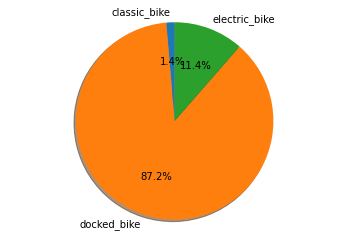

In [35]:
labels = count_rideable_type_casual_df["rideable_type"]
sizes = count_rideable_type_casual_df[0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<h1>Share</h1>

<h1>Act</h1>

<h2>Recommendations</h2>

<p>1. Run a digital campaign targeting casuals at following stations. Streeter Dr & Grand Ave, Lake Shore Dr & Monroe St, Clark St & Elm St.</p>
<p>2. Run the campaign between July and August.</p> 
<p>3. Run the campaign between 6 to 7 pm.</p>
<p>4. Run a promotion for member only on rides length below 1 hour. This will encourage casuals to become a member.</p>
<p>5. Run a promotion for member only on docked bike. This will encourage casuals to become a member</p>